# Penilaian Kualitas Buah Apel dengan KNN dan Random Forest

DBS Coding Camp
- Zuhair Nashif Abdurrohim
- 1301223102
- MC012D5Y1127

# Import

Melakukan import beberapa librari yang dibutuhkan

In [ ]:
# Library untuk visualisasi
import seaborn as sns
import matplotlib.pyplot as plt

# File handling dan sistem
import os
import zipfile
from google.colab import files

# Data processing
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Model ML
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

# Evaluasi model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Data Loading

Mengambil data dari kaggle
- Upload kaggle.json untuk API kaggle
- Ekstract data
- Rubah menjadi dataframe

In [ ]:
# Upload file kaggle.json
files.upload()

# Setup untuk API kaggle
os.makedirs("/root/.kaggle", exist_ok=True)
os.rename("kaggle.json", "/root/.kaggle/kaggle.json")
os.chmod("/root/.kaggle/kaggle.json", 600)

# Download dataset dari Kaggle
!kaggle datasets download -d nelgiriyewithana/apple-quality

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/nelgiriyewithana/apple-quality
License(s): other
apple-quality.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# Ekstrak file ZIP
with zipfile.ZipFile("apple-quality.zip", 'r') as zip_ref:
    zip_ref.extractall("apple_quality")

# Import dataset ke DataFrame dan tampilkan
df = pd.read_csv("apple_quality/apple_quality.csv")
df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


# EDA : Exploratory Data Analysis

Melakukan Explorasi dataset, mengetahui semua variable dan tipe data dari fitur dan target

In [ ]:
# Menampilkan informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


Merubah tipe data fitur Acidity dari object menjadi float64

In [ ]:
# Merubah tipe data Acidity dari object -> float64
df['Acidity'] = pd.to_numeric(df['Acidity'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(8), object(1)
memory usage: 281.4+ KB


Menampilkan deskripsi dataset (rata2, max, min dan lain lain)

In [ ]:
# Menampilkan deskripsi data
df.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277,0.076877
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427,2.110270
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599,-7.010538
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677,-1.377424
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445,0.022609
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212,1.510493
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837,7.404736


Menampilkan ukuran dataset

In [ ]:
# Menampilkan ukuran data
df.shape

(4001, 9)

### Atasi Missing Value

Menghitung banyak data yang memiliki nilai null / NaN

In [ ]:
# Check apakah ada data null atau NaN
df.isnull().sum()

,0
A_id,1
Size,1
Weight,1
Sweetness,1
Crunchiness,1
Juiciness,1
Ripeness,1
Acidity,1
Quality,1


Menampilkan data yang memiliki nilai null / NaN

In [ ]:
# Tampilkan data yang bernilai null atau NaN
df[df.isnull().any(axis=1)]

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
4000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Karena hanya 1 data, maka metode menghapus data untuk mengatasi missing value dipilih karena tidak terlalu berbengaruh besar dari kesuluruhan data

In [ ]:
# Menghapus baris dengan data NaN
df = df.dropna()

df.shape

(4000, 9)

### Atasi Outlier

Mendeklarasikan fitur2 yang termasuk dalam tipe data numerik

In [ ]:
# Daftar kolom dengan tipe data numerik
numerical_features = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']

Tampilkan nilai outlier dalam boxplot, terlihat ada beberapa data outlier (lingkaran kecil diluar batas max / min)

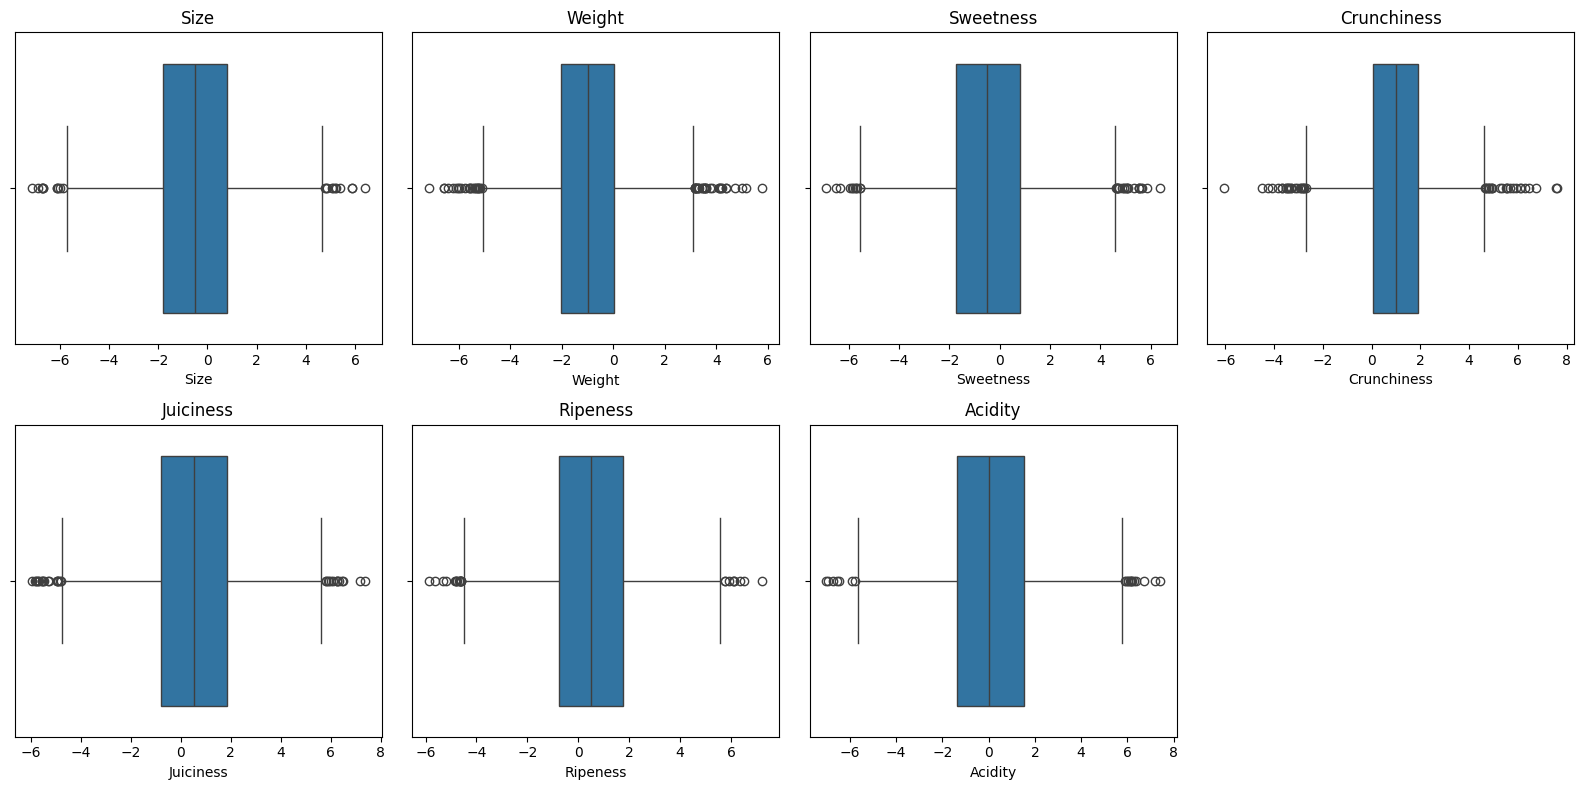

In [ ]:
# Menampilkan boxplot untuk setiap fitur numerical
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

for i, col in enumerate(numerical_features):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(col)

for i in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

Mengatasi outlier dengan mengganti nilai outlier menjadi batas terdekatnya

In [ ]:
# Atasi outlier dengan menggantinya dengan nilai batas atas / bawah IQR (Winsorizing)
def winsorize_iqr(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  df[column] = df[column].apply(
      lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x
  )
  return df

df = winsorize_iqr(df, 'Size')
df = winsorize_iqr(df, 'Weight')
df = winsorize_iqr(df, 'Sweetness')
df = winsorize_iqr(df, 'Crunchiness')
df = winsorize_iqr(df, 'Juiciness')
df = winsorize_iqr(df, 'Ripeness')
df = winsorize_iqr(df, 'Acidity')

Tampilkan boxplot setelah dilakukan penanganan outlier, terlihat sudah tidak ada data yang outlier setelah diatasi sebelumnya

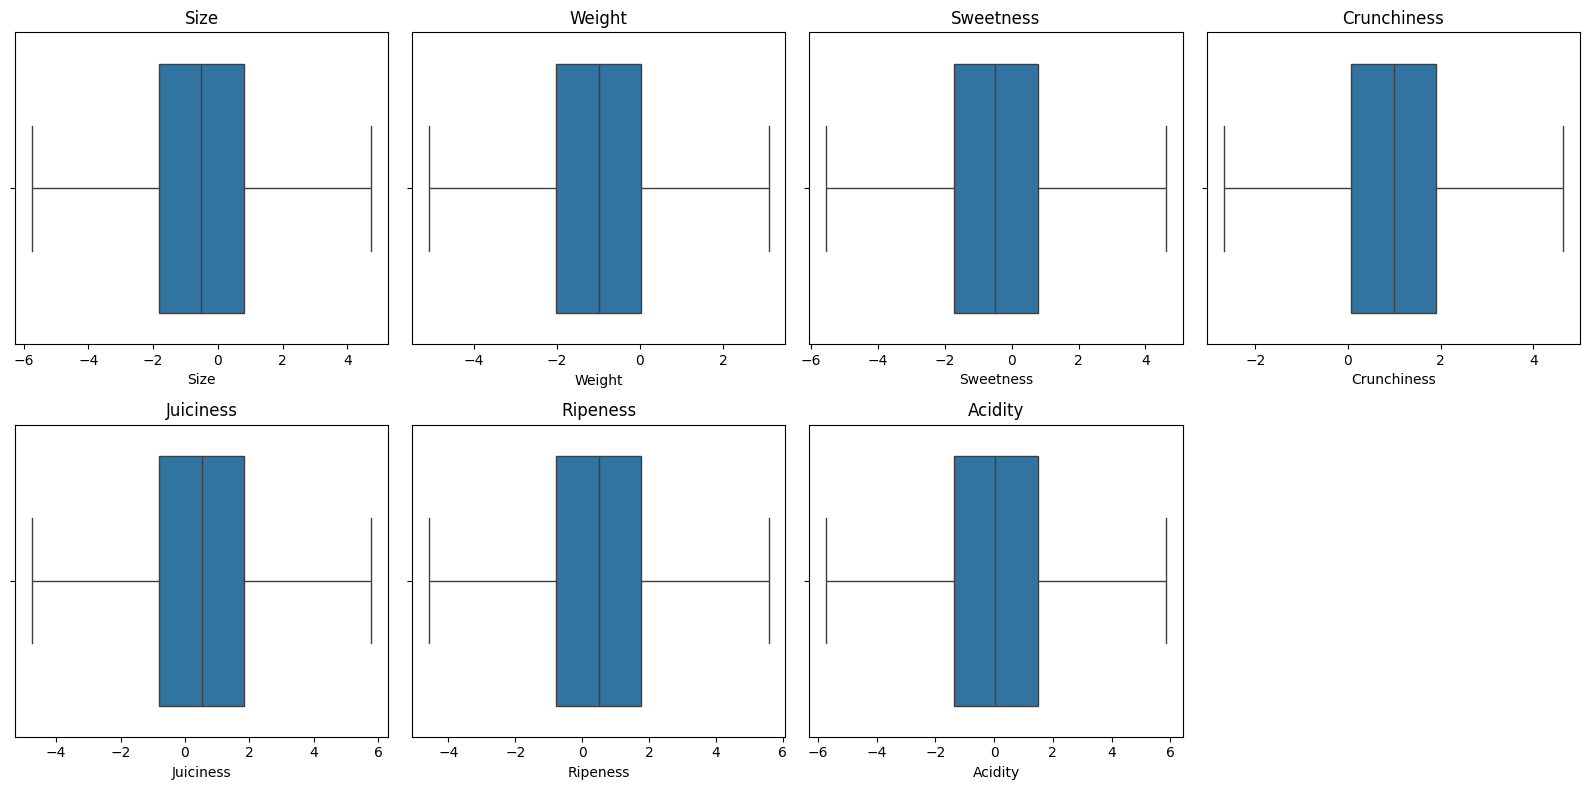

In [ ]:
# Tampilkan kembali boxplot setelah outlier diatasi
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

for i, col in enumerate(numerical_features):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(col)

for i in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

### Univariate Analysis

Mendeklarasikan juga variable yang termasuk tipe categorical

In [ ]:
# Pembagian fitur berdasar tipenya
numerical_features = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']
categorical_features = ['Quality']

Menampilkna persebaran data pada kolom quality, terlihat jika data quality seimbnag secara jumlah untuk tipe good dan bad

         Jumlah  Persentase
Quality                    
good       2004        50.1
bad        1996        49.9


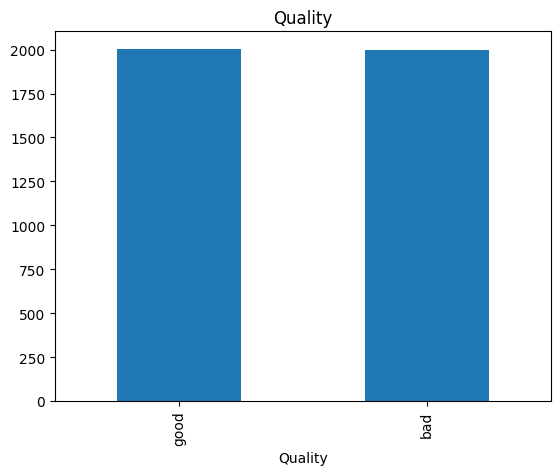

In [ ]:
# Melihat persebaran data Quality

feature = categorical_features[0];
count = df['Quality'].value_counts()
percent = 100*df['Quality'].value_counts(normalize=True)
df_quality = pd.DataFrame({'Jumlah':count, 'Persentase':percent.round(1)})
print(df_quality)
count.plot(kind='bar', title=feature);

Menampilkan juga persebaran untuk data numerikal, terlihat tersebar secara normal, sebagian besar terkonsetrasi pada nilai rata2. Untuk fitur / kolom id akan dihapus nantinya karena dianggap tidak relevan

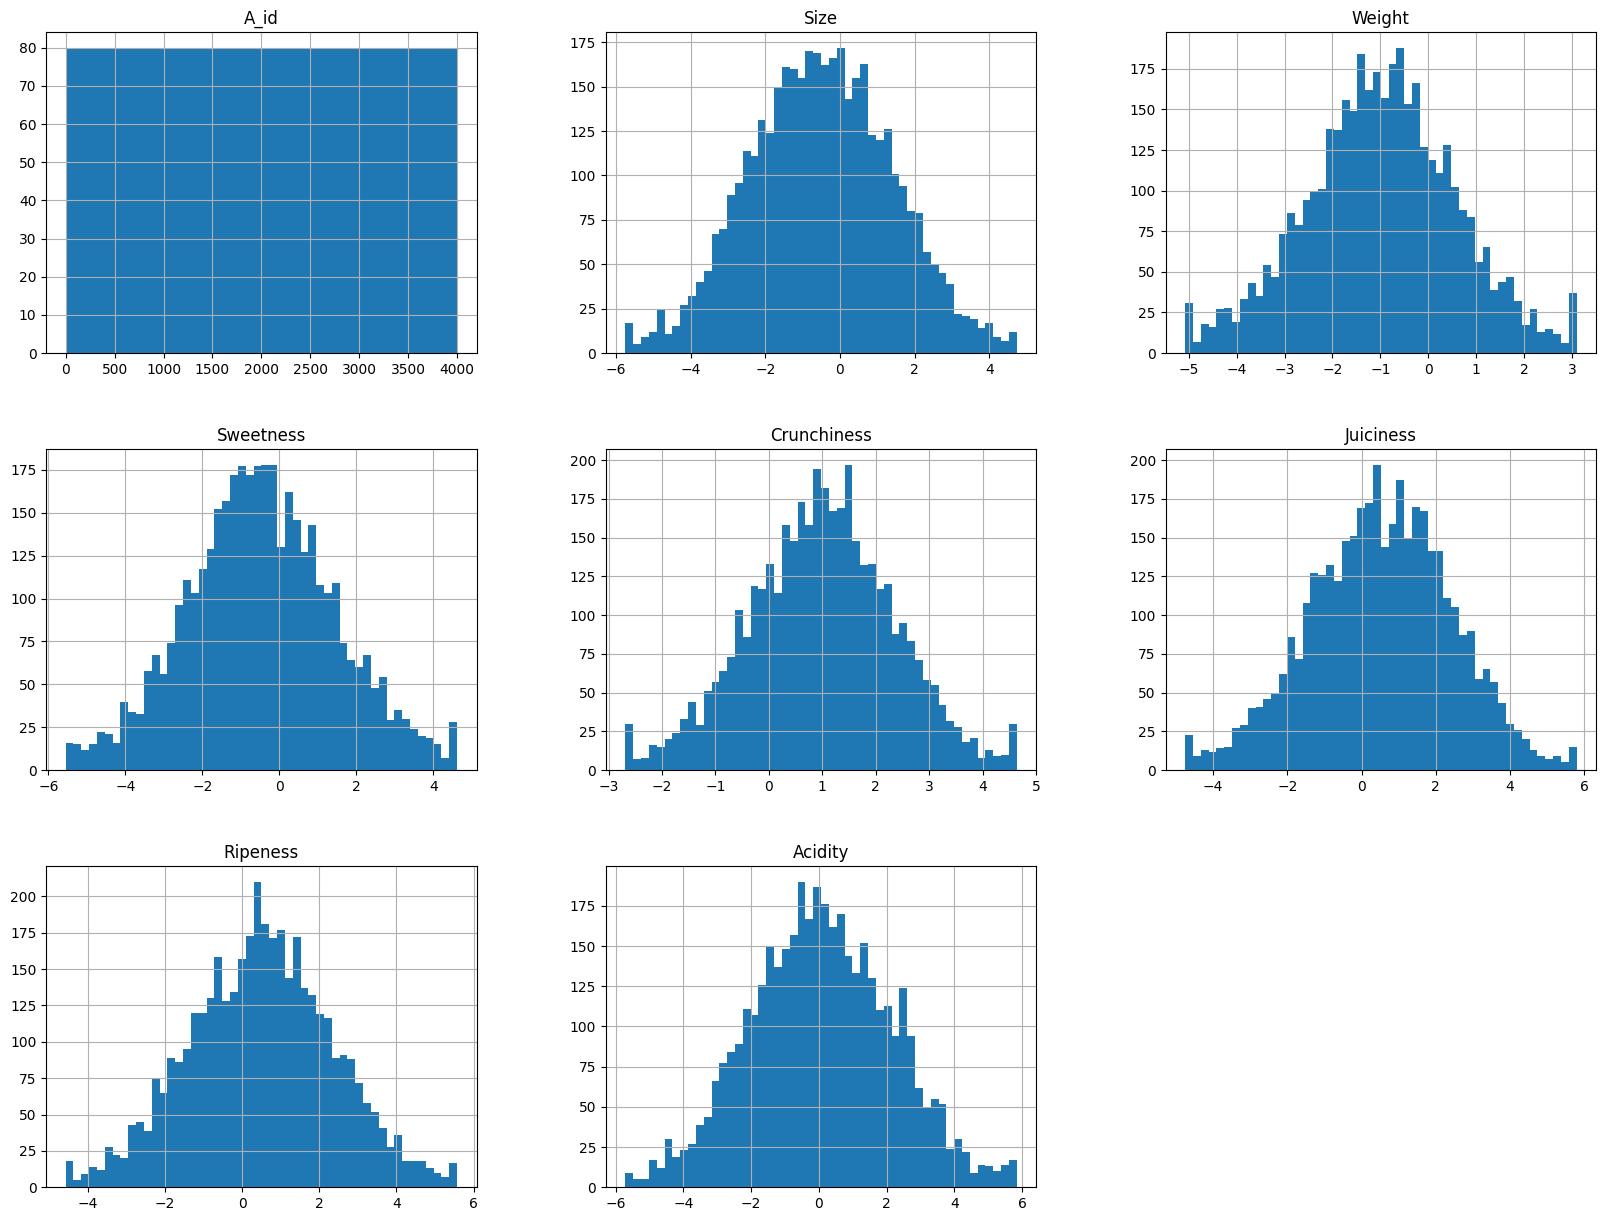

In [ ]:
# Melihat persebaran data untuk numerical features
df.hist(bins=50, figsize=(20,15))
plt.show()

### Multivariate Analysis

Menmpilkan korelasi untuk multicariate / antar variable, terlihat distribusi mendekati normal untuk masing - masing. Tidak ada hubungan multivariat kuat, maka perlu memilih algoritma yang tidak terlalu peka terhadap korelasi fitur

In [ ]:
# Scatter plot untuk hubungan 2 numerical features
sns.pairplot(df, diag_kind = 'kde')

Output hidden; open in https://colab.research.google.com to view.

Menampilkan heatmap korelasi menunjukkan bahwa hampir semua pasang fitur memiliki korelasi lemah

Text(0.5, 1.0, 'Correlation Heatmap unutuk Numerical Features')

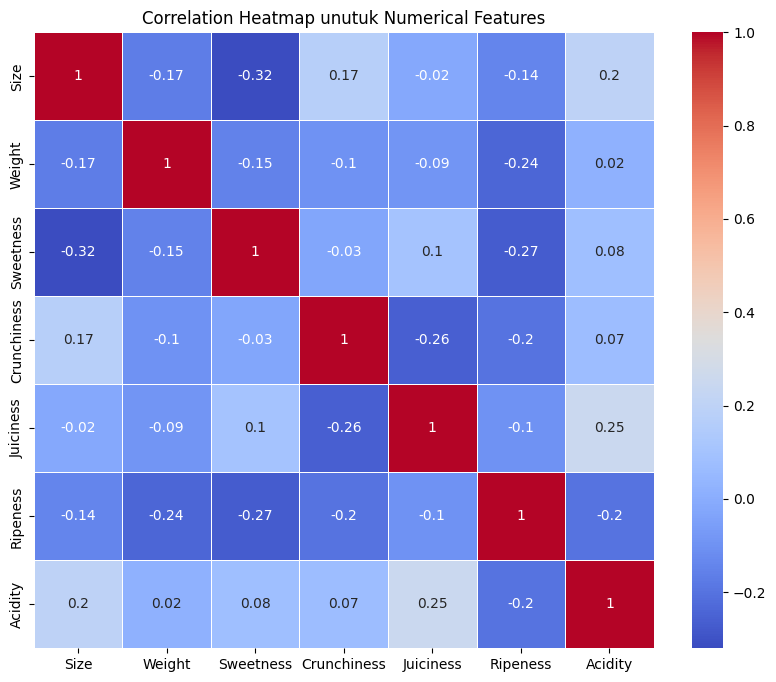

In [ ]:
# Heatmap untuk hubungan 2 fitur
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_features].corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title('Correlation Heatmap unutuk Numerical Features')

Dilakukannya drop / penghapusan fitur id, karena tidak relevan dan tidak digunakan

In [ ]:
# Lakukan drop colom ID karena tidak digunakan
df = df.drop(['A_id'], axis=1)
df

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,4.612442,-1.012009,1.844900,0.329840,-0.491590,good
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good
...,...,...,...,...,...,...,...,...
3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784,bad
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235,good
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611,bad
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720,good


# Data Preparation

### Encoding kategori

Melakukan encoding data quality, yaiut merubah dari good / bad menjadi 1/0, ini dilakukan karena ML tidak bisa memproses bentuk kategorikal secara langsung

In [ ]:
# Melakukan encoding untuk kolom Quality dan menggantinya menjadi 1 dan 0
le = LabelEncoder()
mapping = {'good': 1, 'bad': 0}
df['Quality'] = le.fit_transform(df['Quality'].map(mapping))
df

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,4.612442,-1.012009,1.844900,0.329840,-0.491590,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1
...,...,...,...,...,...,...,...,...
3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784,0
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235,1
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611,0
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720,1


### Split Data

Melakukan pembagian data untuk persiapan pembuatan / pelatihan model, memastikan data uji bukan berasal dari data latih

In [ ]:
# Melakukan split data 80:20 persiapan pembuatan model
from sklearn.model_selection import train_test_split

X = df.drop(['Quality'], axis=1)
y = df['Quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Menampilkan jumlah pembagian data

In [ ]:
# Tampilkan jumlah data
print(len(X))
print(len(X_train))
print(len(X_test))

4000
3200
800


### Standarisasi

melakukan standarisasi hanya pada data latih

In [ ]:
# Lakukan standarisasi
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])

# Transform dan simpan hasilnya ke kolom yang sama
X_train[numerical_features] = scaler.transform(X_train[numerical_features])
X_train[numerical_features].describe().round(4)

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
count,3200.0000,3200.0000,3200.0000,3200.0000,3200.0000,3200.0000,3200.0000
mean,0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,0.0000
std,1.0002,1.0002,1.0002,1.0002,1.0002,1.0002,1.0002
min,-2.7402,-2.6092,-2.6154,-2.6643,-2.7542,-2.7189,-2.7691
25%,-0.6849,-0.6489,-0.6520,-0.6721,-0.6823,-0.6775,-0.6953
50%,-0.0121,0.0018,-0.0212,0.0131,0.0137,0.0007,-0.0304
75%,0.6849,0.6405,0.6607,0.6655,0.6861,0.6742,0.6758
max,2.7336,2.5964,2.6209,2.6729,2.7374,2.7306,2.7475


# Modeling

Membuat dataframe untuk menyimpan hasil MSE

In [ ]:
# Membuat dataframe untuk menyimpan MSE
models = pd.DataFrame(index=['train_mse', 'test_mse'], columns=['KNN', 'Random Forest'])

### KNN

Pembuatan model KNN dengan KNeighborsRegressor dan jumlah tetangga 10

Tahapan:
1. **Inisiasi Model:** Membuat objek model KNN dengan parameter `n_neighbors=10`. Parameter ini menentukan jumlah tetangga terdekat yang akan dipertimbangkan dalam proses prediksi.
2. **Training:** Model KNN dilatih menggunakan data latih (X_train dan y_train) dengan memanggil fungsi `fit()`.


Parameter:
- `n_neighbors=10`: Jumlah tetangga terdekat yang dipertimbangkan.


Kelebihan:
- Mudah diimplementasikan dan dipahami.
- Tidak memerlukan asumsi tentang distribusi data.


Kekurangan:
- Dapat terpengaruh oleh fitur yang tidak relevan.
- Komputasi dapat menjadi mahal untuk dataset yang besar.
### Random Forest

In [ ]:
# Membuat model KNN
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)

models.loc['train_mse', 'knn'] = mean_squared_error(y_pred=knn.predict(X_train), y_true=y_train)

### Random Forest

Pembuatan model Random Forest dengan RandomForestRegressor dan n estimator 50 dan maximum kedalaman kita set 10

Tahapan:
1. **Inisiasi Model:** Membuat objek model Random Forest dengan parameter `n_estimators=50`, `max_depth=10`, `random_state=42`, dan `n_jobs=-1`.
2. **Training:** Model Random Forest dilatih menggunakan data latih (X_train dan y_train) dengan memanggil fungsi `fit()`.


Parameter:
- `n_estimators=50`: Jumlah pohon keputusan dalam _ensemble_.
- `max_depth=10`: Kedalaman maksimum setiap pohon keputusan.
- `random_state=42`: Untuk memastikan reproduktifitas hasil.
- `n_jobs=-1`: Menggunakan semua _core_ prosesor untuk mempercepat proses training.


Kelebihan:
- Mampu menangani data dengan banyak fitur dan _outlier_.
- Lebih robust dan akurat dibandingkan dengan pohon keputusan tunggal.


Kekurangan:
- Dapat menjadi _overfitting_ jika tidak diparameterisasi dengan baik.
- Lebih kompleks dan sulit diinterpretasi dibandingkan dengan KNN.

In [ ]:
# Membuat model Random Forest
RF = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42, n_jobs=-1)
RF.fit(X_train, y_train)

models.loc['train_mse', 'randomforest'] = mean_squared_error(y_pred=RF.predict(X_test), y_true=y_test)

# Evaluation

enjelasan Metrik
1. **MSE (Mean Squared Error):**
    - Digunakan untuk mengukur rata-rata kuadrat selisih antara nilai prediksi dan nilai aktual.
    - Semakin kecil nilai MSE, semakin baik performa model.
    - Formula:
$$
MSE = 1/n * Σ(y_i - ŷ_i)^2
$$
di mana:
- $n$ adalah jumlah data
- $y_i$ adalah nilai aktual
- $ŷ_i$ adalah nilai prediksi

2. **Accuracy:**
    - Mengukur proporsi prediksi yang benar dari keseluruhan data.
    - Formula:
$$
Accuracy = (TP + TN) / (TP + TN + FP + FN)
$$
di mana:
- TP: *True Positive* (prediksi benar, kelas positif)
- TN: *True Negative* (prediksi benar, kelas negatif)
- FP: *False Positive* (prediksi salah, kelas positif)
- FN: *False Negative* (prediksi salah, kelas negatif)

3. **Precision:**
    - Mengukur proporsi prediksi positif yang benar dari keseluruhan prediksi positif.
    - Formula:
$$
Precision = TP / (TP + FP)
$$

4. **Recall:**
    - Mengukur proporsi prediksi positif yang benar dari keseluruhan data yang sebenarnya positif.
    - Formula:
$$
Recall = TP / (TP + FN)
$$

5. **F1-Score:**
    - Merupakan rata-rata harmonik dari _precision_ dan _recall_.
    - Memberikan keseimbangan antara _precision_ dan _recall_.
    - Formula:
$$
F1-Score = 2 * (Precision * Recall) / (Precision + Recall)
$$


### MSE

Melakukan evaluasi dengan menghitung nilai MSE untuk KNN dan Random Forest

In [ ]:
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

In [ ]:
# Hitung dan tampilkan MSE
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN', 'Random Forest'])

model_dict = {'KNN': knn, 'Random Forest': RF}

for name, model in model_dict.items():
  mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))
  mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))

mse

,train,test
KNN,0.062634,0.074175
Random Forest,0.038517,0.088296


### Accuracy, Precision, Recall, F1-Score

Menghitung dan menampilkan juga matriks evaluasi lainnya seperti akurasi, presisi, recall, dan F1 Score

In [ ]:
# Matriks evaluasi
evaluation_metrics = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1-Score'], index=['KNN', 'Random Forest'])

# KNN
knn_predictions = knn.predict(X_test)
knn_predictions = (knn_predictions > 0.5).astype(int)
evaluation_metrics.loc['KNN', 'Accuracy'] = accuracy_score(y_test, knn_predictions)
evaluation_metrics.loc['KNN', 'Precision'] = precision_score(y_test, knn_predictions)
evaluation_metrics.loc['KNN', 'Recall'] = recall_score(y_test, knn_predictions)
evaluation_metrics.loc['KNN', 'F1-Score'] = f1_score(y_test, knn_predictions)


# Random Forest
rf_predictions = RF.predict(X_test)
rf_predictions = (rf_predictions > 0.5).astype(int)
evaluation_metrics.loc['Random Forest', 'Accuracy'] = accuracy_score(y_test, rf_predictions)
evaluation_metrics.loc['Random Forest', 'Precision'] = precision_score(y_test, rf_predictions)
evaluation_metrics.loc['Random Forest', 'Recall'] = recall_score(y_test, rf_predictions)
evaluation_metrics.loc['Random Forest', 'F1-Score'] = f1_score(y_test, rf_predictions)

evaluation_metrics


,Accuracy,Precision,Recall,F1-Score
KNN,0.9,0.920844,0.874687,0.897172
Random Forest,0.89875,0.889706,0.909774,0.899628


- **KNN** memiliki keunggulan dalam **Accuracy** dan **Precision**, menunjukkan bahwa ia lebih baik dalam hal mengidentifikasi label positif dengan akurat.
- **Random Forest** unggul dalam **Recall** dan **F1-Score**, yang menunjukkan kemampuannya lebih baik dalam menangkap semua kasus positif dan memiliki keseimbangan antara precision dan recall.

Secara keseluruhan, jika menginginkan keseimbangan antara precision dan recall, **Random Forest** mungkin sedikit lebih baik karena F1-Score yang lebih tinggi.

# Uji

Melakukan uji dengan salah satu data dan menampilkan prediksinya, hasilnya memprediksi kualitas = 1 / Good baik dari model KNN dan Random Forest

In [ ]:
# Uji dengan data terakhir dalam df
last_apple = df.tail(1).copy()

X_last_apple = last_apple.drop('Quality', axis=1)
y_true = last_apple['Quality'].values[0]

X_last_apple.loc[:, numerical_features] = scaler.transform(X_last_apple[numerical_features])

knn_prediction = knn.predict(X_last_apple)[0]
rf_prediction = RF.predict(X_last_apple)[0]

print(f"Actual Quality: {y_true}")

print(f"KNN Rounded Prediction: {round(knn_prediction)}")
print(f"Random Forest Rounded Prediction: {round(rf_prediction)}")

Actual Quality: 1
KNN Rounded Prediction: 1
Random Forest Rounded Prediction: 1


# Business Understanding (Tambahan Hubungan dengan Bisnis/Kehidupan Nyata)
Proyek ini memiliki hubungan langsung dengan kebutuhan industri agrikultur dan rantai pasok distribusi buah, khususnya untuk produsen apel, distributor, supermarket, dan eksportir. Dengan adanya sistem klasifikasi kualitas apel berbasis machine learning:

Produsen dapat mengotomatisasi proses sortasi kualitas, mengurangi ketergantungan pada tenaga kerja manual yang sering subjektif dan inkonsisten.

Distributor dan pengecer dapat memastikan hanya apel berkualitas tinggi yang sampai ke konsumen, sehingga meningkatkan reputasi merek dan kepercayaan pelanggan.

Konsumen akhir akan menerima produk dengan kualitas lebih konsisten, meningkatkan kepuasan dan loyalitas.

Perusahaan ekspor dapat memenuhi standar mutu internasional dengan lebih mudah dan konsisten, sehingga memperluas pasar.

Implementasi sistem ini juga berpotensi menurunkan biaya operasional dan waktu proses sortasi hingga 20-30% (berdasarkan studi-studi otomasi kualitas di bidang agrikultur). Dengan demikian, proyek ini tidak hanya berdampak teknis, tetapi juga memberikan nilai ekonomis dan kompetitif bagi pelaku bisnis di bidang distribusi buah.